## AIM: **Twitter Sentiment Analysis**
## NAME: Palak Nath
## PRN: 17070124048

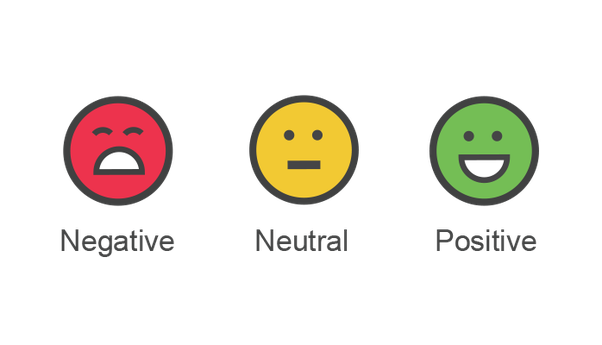





**IMPORTING THE LIBRARIES**


In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**LOADING THE ACCESS KEY INFORMATION**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Access Tokens Twitter.csv to Access Tokens Twitter (1).csv


In [3]:
#Get the data
log=pd.read_csv('Access Tokens Twitter.csv')

**AUTHENTICATING AND CREATING API OBJECT**

In [4]:
#Twitter API credentials
consumerKey = log['Value'][0]
consumerSecret = log['Value'][1]
accessToken = log['Value'][3]
accessTokenSecret = log['Value'][4]

In [5]:
#Authentication Object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set the access token and the access token secret
authenticate.set_access_token(accessToken,accessTokenSecret)

#Create the API objects while passing the auth information
api = tweepy.API(authenticate,wait_on_rate_limit = True)

**EXTRACTING 100 TWEETS FROM AN ACTIVE TWITTER USER**

In [6]:
#SELECT THE TWITTER USER
twitter_screen_name = "BillGates" #I am choosing Bill Gates as he is trying to craete a positive impact

In [7]:
#GETTING THE POSTS OF THE TWITTER USER
posts = api.user_timeline(screen_name = twitter_screen_name, count=100, language= "en" ,tweet_mode= "extended" )

#Print 5 recent tweets from this account
print("Show the 5 recent Tweets from this account: \n")
i=1
for tweet in posts[0:5]:
  print(str(i) + ')'+ tweet.full_text + '\n')
  i=i+1

Show the 5 recent Tweets from this account: 

1)RT @WHO: It's #WorldTBDay

Even as we battle #COVID19, we must not ease up the fight against #Tuberculosis, which remains the 🌎🌍🌏’s deadlie…

2)I’m answering your questions now on @reddit: https://t.co/HXMsI0lSK1 https://t.co/XG7eAMNrGM

3)In this video, I answered some really good questions, including one about two really important numbers. Come ask me some questions of your own on @reddit at 11:15: https://t.co/HXMsI0lSK1 https://t.co/SQ4N1MlxGO

4)After you finish your pancakes this morning, come ask me anything on @reddit at 11:15 Pacific Time: https://t.co/R3wfDhtqxD https://t.co/fAPRPUWQtu

5)It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects: https://t.co/XciR3lIVzs https://t.co/Y2do5GhsGx



**CONVERTING EXTRACTED POSTS INTO A DATAFRAME**

In [8]:
#Create a Dataframe with a column called Tweets to make the extracted Tweets more accessible

df= pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'] )

#Show first 5 columns of this dataframe
df.head()

,Tweets
0,RT @WHO: It's #WorldTBDay\n\nEven as we battle...
1,I’m answering your questions now on @reddit: h...
2,"In this video, I answered some really good que..."
3,"After you finish your pancakes this morning, c..."
4,It’s deeply unfair that the people who contrib...


**GETTING DATETIME OF TWEETS**

In [9]:
#Adding a column called Tweets to show datetime 

dt= pd.DataFrame( [tweet.created_at for tweet in posts] , columns=['Datetime'] )
df['Datetime'] = dt
#Show first 5 columns of this dataframe
df.head()

,Tweets,Datetime
0,RT @WHO: It's #WorldTBDay\n\nEven as we battle...,2021-03-24 22:00:50
1,I’m answering your questions now on @reddit: h...,2021-03-19 18:14:28
2,"In this video, I answered some really good que...",2021-03-19 17:27:50
3,"After you finish your pancakes this morning, c...",2021-03-19 15:02:23
4,It’s deeply unfair that the people who contrib...,2021-03-18 20:26:15


**CREANING THE DATA**


*   Removing '@'
*   Removing Hashtags
*   Removing Hyperlinks



In [10]:
#Clean Text Function

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #substituting the @ with a empty string
#using r we are telling python it is a raw string containing @ followed by either a number, lowercase or uppercase character 

  text = re.sub(r'#', '', text) #substituting the # with a empty string
  text = re.sub(r'RT[\s]', '', text) #removing RT retweet
  text = re.sub(r'https?:\/\/\S+', '', text) #removing any hyperlink

  return text

In [11]:
#Applying the Clean Text Function to the Tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Show the Cleaned Texts
df

,Tweets,Datetime
0,: It's WorldTBDay\n\nEven as we battle COVID19...,2021-03-24 22:00:50
1,I’m answering your questions now on :,2021-03-19 18:14:28
2,"In this video, I answered some really good que...",2021-03-19 17:27:50
3,"After you finish your pancakes this morning, c...",2021-03-19 15:02:23
4,It’s deeply unfair that the people who contrib...,2021-03-18 20:26:15
...,...,...
95,: “I will continue fighting. I will continue s...,2020-11-25 18:04:32
96,Today is the 25th anniversary of my first book...,2020-11-24 18:21:39
97,"This week, Rashida and I ask a big question th...",2020-11-23 19:41:14
98,: How can the fight to endpolio help inform th...,2020-11-22 19:31:40


**MOST FREQUENTLY OCCURING WORDS: TOP 30**

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

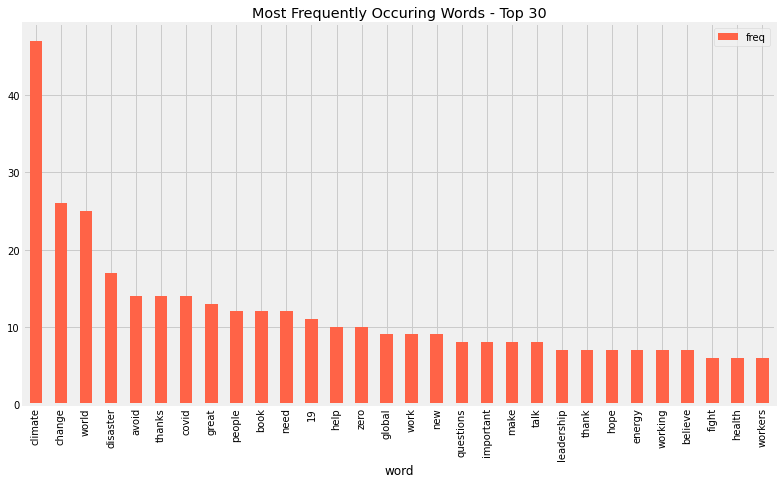

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.Tweets)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(12, 7), color = 'tomato')
plt.title("Most Frequently Occuring Words - Top 30")

**GET SUBJECTIVITY AND POLARITY**

> **Subjectivity** tells about how opinionated the text is

> **Polarity** tells how Positive or Negative the text is





In [13]:
#Get Subjectivity function

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity 

#create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#SHow the new Dataframe with the new columns
df

,Tweets,Datetime,Subjectivity,Polarity
0,: It's WorldTBDay\n\nEven as we battle COVID19...,2021-03-24 22:00:50,0.000000,0.000000
1,I’m answering your questions now on :,2021-03-19 18:14:28,0.000000,0.000000
2,"In this video, I answered some really good que...",2021-03-19 17:27:50,0.866667,0.566667
3,"After you finish your pancakes this morning, c...",2021-03-19 15:02:23,0.000000,0.000000
4,It’s deeply unfair that the people who contrib...,2021-03-18 20:26:15,0.800000,-0.600000
...,...,...,...,...
95,: “I will continue fighting. I will continue s...,2020-11-25 18:04:32,0.312500,0.062500
96,Today is the 25th anniversary of my first book...,2020-11-24 18:21:39,0.393810,0.067143
97,"This week, Rashida and I ask a big question th...",2020-11-23 19:41:14,0.470000,0.200000
98,: How can the fight to endpolio help inform th...,2020-11-22 19:31:40,0.000000,0.000000


**SCATTER PLOT**
> POLARITY VS SUBJECTIVITY

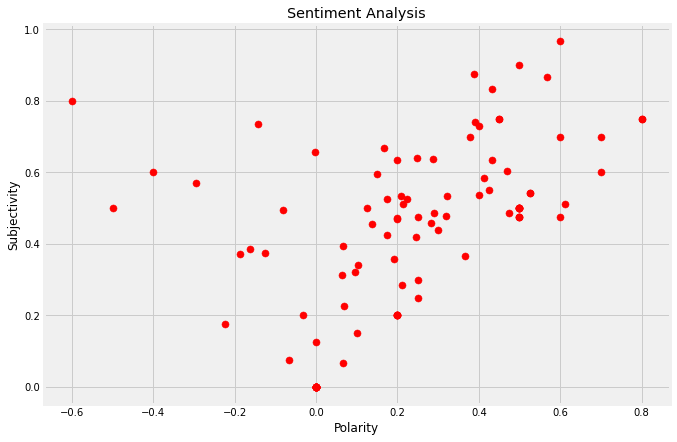

In [14]:
plt.figure(figsize=(10,7))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Red' , s=50)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

**FINDING LENGTH OF TWEEETS**

In [15]:
# adding a column to represent the length of the tweets

df['len'] = df['Tweets'].str.len()
df.head(10)

,Tweets,Datetime,Subjectivity,Polarity,len
0,: It's WorldTBDay\n\nEven as we battle COVID19...,2021-03-24 22:00:50,0.000000,0.000000,130
1,I’m answering your questions now on :,2021-03-19 18:14:28,0.000000,0.000000,39
2,"In this video, I answered some really good que...",2021-03-19 17:27:50,0.866667,0.566667,158
3,"After you finish your pancakes this morning, c...",2021-03-19 15:02:23,0.000000,0.000000,94
4,It’s deeply unfair that the people who contrib...,2021-03-18 20:26:15,0.800000,-0.600000,119
5,: Over the past few weeks health workers in Et...,2021-03-18 16:17:40,0.175000,-0.225000,130
6,I named my book “How to Avoid a Climate Disast...,2021-03-17 16:20:14,0.500000,0.500000,240
7,Congratulations on this important role. I’m e...,2021-03-11 23:46:36,0.875000,0.387500,210
8,Thank you for a great conversation about clim...,2021-03-11 20:36:16,0.475000,0.500000,100
9,"For decades, Australian researcher Ruth Bishop...",2021-03-10 18:52:27,0.200000,-0.033333,256


**NUMBER OF TWEETS VS THE LENTGH OF TWEETS**

Text(0.5, 1.0, 'Average Length of the Tweets')

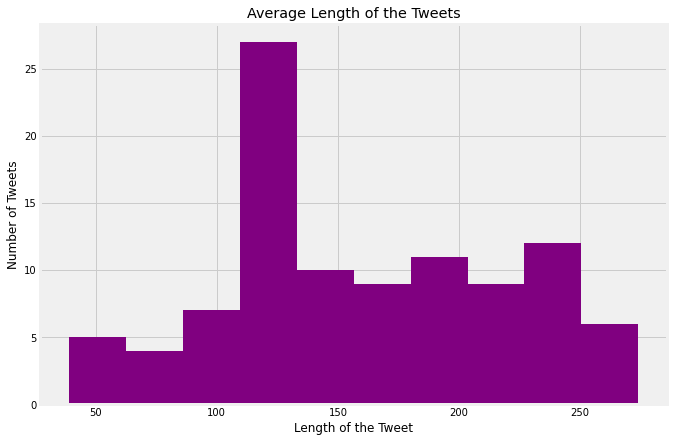

In [16]:
length_train = df['Tweets'].str.len().plot.hist(color = 'purple', figsize = (10, 7))
plt.xlabel('Length of the Tweet')
plt.ylabel('Number of Tweets')
plt.title('Average Length of the Tweets')

**LENGTH OF TWEETS ACCORDING TO THE DATES TWEETED**

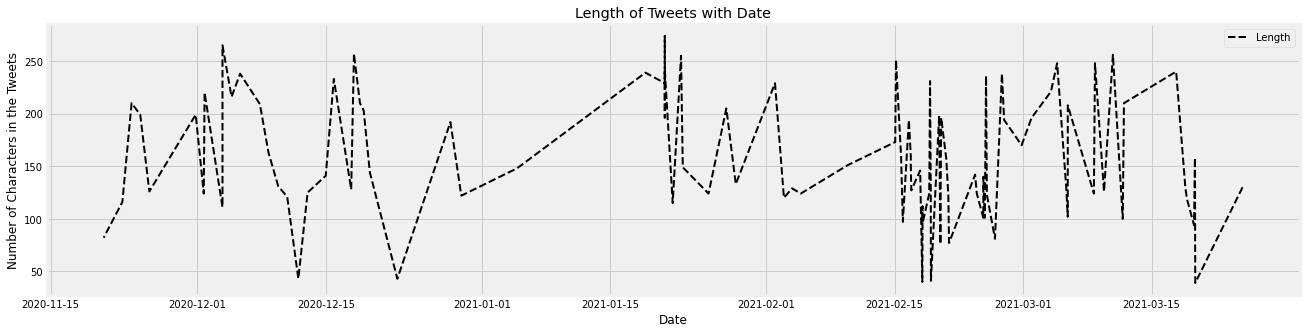

In [17]:
plt.rc('font', size=10)
fig, ax = plt.subplots(figsize=(20, 5))

# Specify how our lines should look
ax.plot(df.Datetime, df.len, color='black', label='Length', linestyle = '--', linewidth=2)

# Same as above
ax.set_xlabel('Date')
ax.set_ylabel('Number of Characters in the Tweets')
ax.set_title('Length of Tweets with Date')
ax.grid(True)
ax.legend(loc='upper right');

**PLOTTING WORD CLOUD** 
> The more a word appears in the tweets the bigger it is


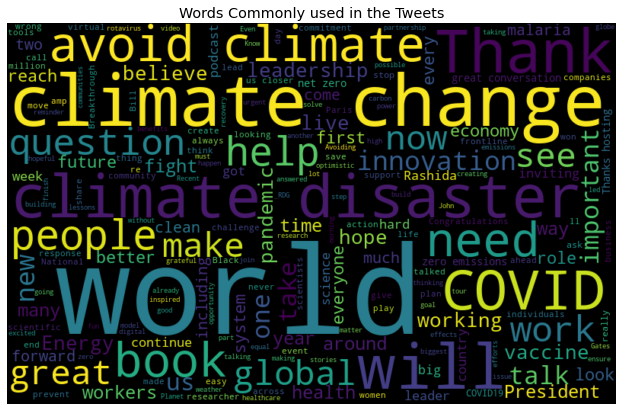

In [18]:
#Visualizing Word Cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width= 800, height=500, random_state=21, max_font_size =160).generate(allWords)
plt.figure(figsize=(10, 7))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.title('Words Commonly used in the Tweets')
plt.show() 


#### OBSERVATION: *We can clearly see the tweets as of 26th March 2021 seem to be using words like WORLD, CLIMATE CHANGE, AVOID, THANK etc* 


#### **CLASSIFYING THE TWEETS AS:**
 - POSITIVE
 - NEGATIVE
 - NEUTRAL

In [19]:
#create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:   
    return 'Positive'  

#Create new column of Analysis in the dataframe
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show the Dataframe
df


,Tweets,Datetime,Subjectivity,Polarity,len,Analysis
0,: It's WorldTBDay\n\nEven as we battle COVID19...,2021-03-24 22:00:50,0.000000,0.000000,130,Neutral
1,I’m answering your questions now on :,2021-03-19 18:14:28,0.000000,0.000000,39,Neutral
2,"In this video, I answered some really good que...",2021-03-19 17:27:50,0.866667,0.566667,158,Positive
3,"After you finish your pancakes this morning, c...",2021-03-19 15:02:23,0.000000,0.000000,94,Neutral
4,It’s deeply unfair that the people who contrib...,2021-03-18 20:26:15,0.800000,-0.600000,119,Negative
...,...,...,...,...,...,...
95,: “I will continue fighting. I will continue s...,2020-11-25 18:04:32,0.312500,0.062500,126,Positive
96,Today is the 25th anniversary of my first book...,2020-11-24 18:21:39,0.393810,0.067143,199,Positive
97,"This week, Rashida and I ask a big question th...",2020-11-23 19:41:14,0.470000,0.200000,210,Positive
98,: How can the fight to endpolio help inform th...,2020-11-22 19:31:40,0.000000,0.000000,116,Neutral


**SHOWING THE ANALYSIS COUNT**

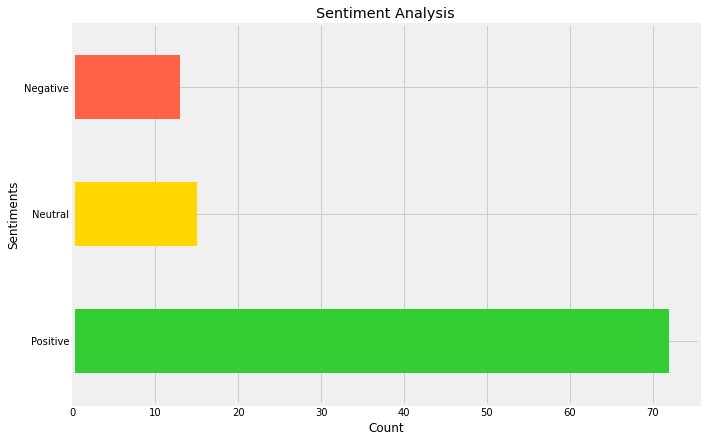

In [20]:
#Show the Value Counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.figure(figsize=(10,7))
plt.title('Sentiment Analysis')
plt.xlabel('Count')
plt.ylabel('Sentiments')
df['Analysis'].value_counts().plot(kind='barh' , color=['Limegreen','gold','tomato'])
plt.show()

#### OBSERVATION: *Our Twitter User seems to be a person trying to spread positivity using his tweets as more than 70% of his tweets (as of 26th March 2021) are positive* 


**SHOWING BOX PLOTS**

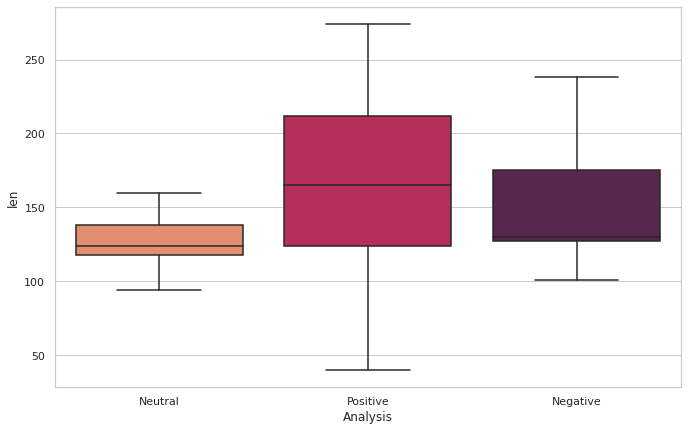

In [21]:
#Analysis Labels vs Length
import seaborn as sns
plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Analysis", y="len", data=df, palette="rocket_r", showfliers=False)

#### OBSERVATION: *Our Twitter User seems to be a person who promotes Poitivity by longer and more emphasised tweets* 


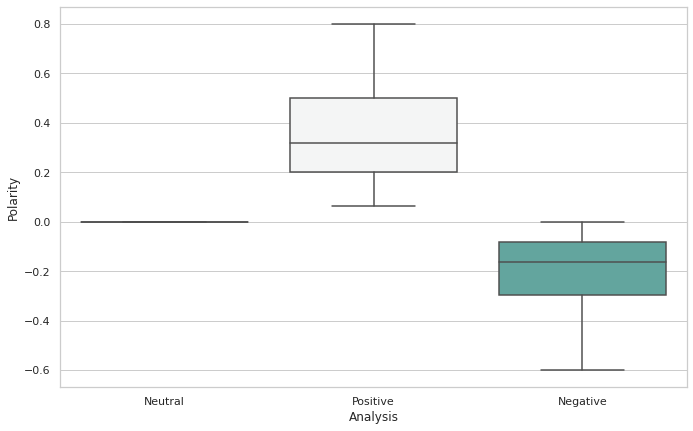

In [22]:
#Analysis Labels vs Polarity
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
ax = sns.boxplot(x="Analysis", y="Polarity",palette="BrBG", data=df)

#### OBSERVATION: *We can clearly see that Neutral texts lie on the edge of 0 whereas positive analysis lie on the positive side and the negative on the negative side* 


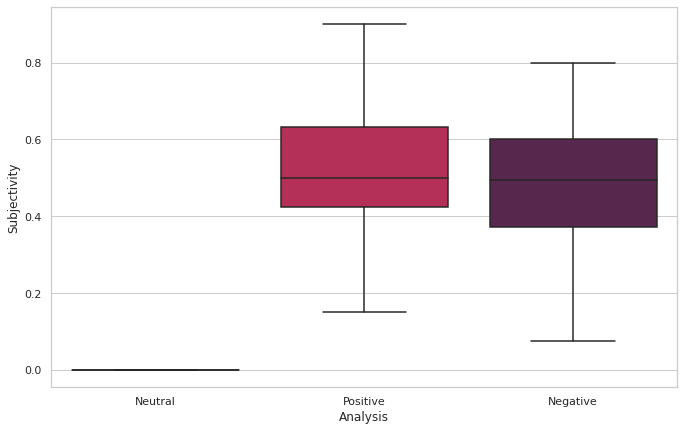

In [23]:
#Analysis Labels vs Subjectivity
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
ax = sns.boxplot(x="Analysis", y="Subjectivity",palette="rocket_r", data=df, showfliers=False)

#### OBSERVATION: *We can clearly see that Neutral texts are not subjective that is they aren't very opioniated* 


**POLARITY OF TWEETS WITH DATES**

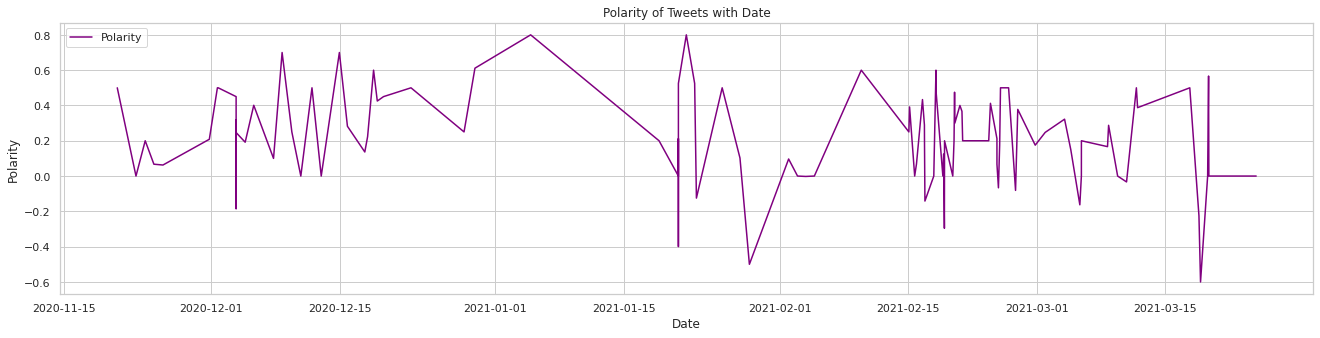

In [24]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 5))

# Specify how our lines should look
ax.plot(df.Datetime, df.Polarity, color='purple', label='Polarity')

# Same as above
ax.set_xlabel('Date')
ax.set_ylabel('Polarity')
ax.set_title('Polarity of Tweets with Date')
ax.grid(True)
ax.legend(loc='upper left');

#### OBSERVATION: *The time series graph clearly shows that our Twitter User seems to be a person who promotes Poitivity as polarity of most of the psts seem to be above the 0.0 line on the y axis* 


**CONVERTING CATEGORICAL VARIABLES INTO NUMERICAL VARIABLES**

In [28]:
df['label'] = df['Analysis'].replace(['Positive','Neutral','Negative'],['1','0','-1'])
df['label'] = df['label'].astype(str).astype(int)

In [26]:
df.groupby('label').describe()

Subjectivity                                ...     len                     
             count      mean       std       min  ...     25%    50%    75%    max
label                                             ...                             
-1            13.0  0.456899  0.220243  0.075000  ...  127.00  130.0  175.0  256.0
 0            15.0  0.008333  0.032275  0.000000  ...  118.00  124.0  138.0  229.0
 1            72.0  0.510452  0.189026  0.066667  ...  123.75  165.0  211.5  274.0

[3 rows x 24 columns]

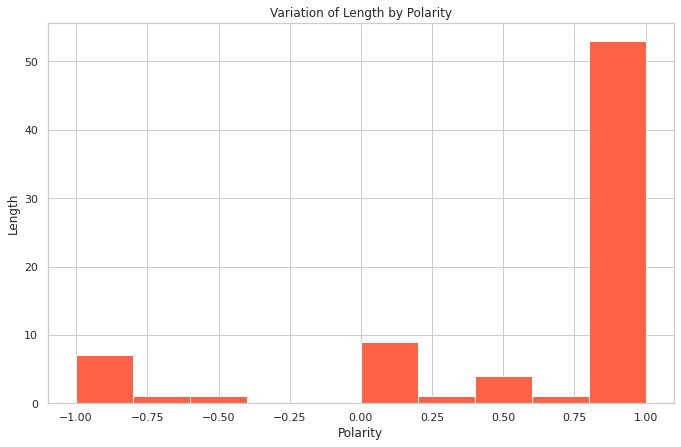

In [27]:
df.groupby('len').mean()['label'].plot.hist(color = 'tomato', figsize = (10, 7),)
plt.title('Variation of Length by Polarity')
plt.xlabel('Polarity')
plt.ylabel('Length')
plt.show()

**HEAT MAP SHOWING CORRELATION BETWEEN THE VARIOUS COLUMNS**

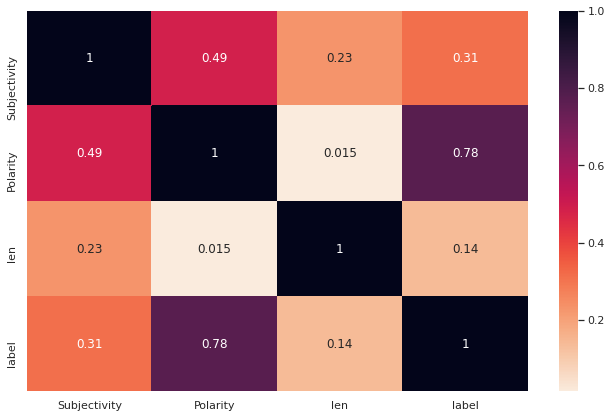

In [29]:
def corr(data):
    correlation = data.corr()
    plt.figure(figsize=(10,7))
    sns.heatmap(correlation, annot=True, cbar=True, cmap="rocket_r")
    
corr(df)

**PRINTING POSITIVE TWEETS**

In [30]:
#print all of the positive tweets

j=1 
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')'+ sortedDF['Tweets'][i])
    print()
    j = j+1

#This will print the Most Positive Tweets followed by second most positive and so on...

1)In this video, I answered some really good questions, including one about two really important numbers. Come ask me some questions of your own on  at 11:15:  

2)I named my book “How to Avoid a Climate Disaster,” not “How to Stop Climate Change,” because our climate is already changing—and no one will be hurt more by climate change than the world’s poorest people. Here's how we can help them adapt. 

3)Congratulations  on this important role. I’m excited to see what you and the Earth Fund will achieve. Avoiding a climate disaster is going to take all of us, and I’m grateful for ’s leadership and partnership. 

4)Thank you  for a great conversation about climate change and thanks to  and  for hosting the event. 

5)Virologist Ruth Bishop pioneered the research that led to the discovery of rotavirus. Her legacy continues both as a role model for other researchers and in the millions of children’s lives that have been saved because of her heroic work:  IWD2021 

6): On International Wom

**MOST COMMON WORDS IN POSITIVE TWEETS**

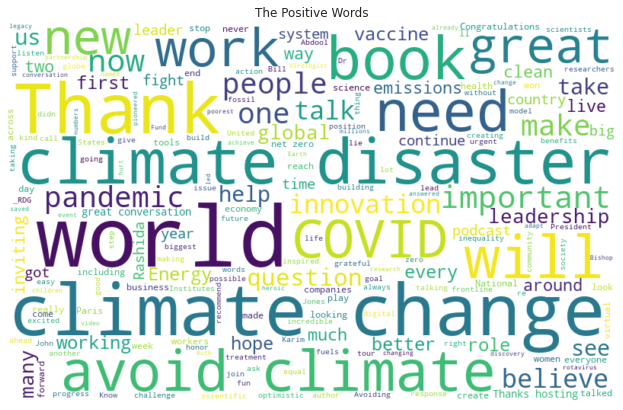

In [31]:
positive_words =' '.join([text for text in df['Tweets'][df['label'] == 1]])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

#### OBSERVATION: *We can clearly see all the positive tweets as of 26th March 2021 seem to be using words like WORLD, CLIMATE CHANGE, NEED, GREAT, THANK etc* 


**PRINTING NEGATIVE TWEETS**

In [32]:
#print all of the negative tweets

j=1 
sorted_negativeDF = df.sort_values(by=['Polarity'], ascending=False) 
for i in range(0, sorted_negativeDF.shape[0]):
  if (sorted_negativeDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')'+ sorted_negativeDF['Tweets'][i])
    print()
    j = j+1

#This will print the Most Negative Tweets followed by second most negative and so on...
#That is why ascending is False

1)It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:  

2): Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

3)For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 

4): Black folks have questions about the COVID-19 vaccine. I sat down w/ Black healthcare workers &amp; they answered my questions.…

5)Recent extreme weather events are a stark reminder that we’re already seeing the effects of climate change here at home and around the world. This type of observation system will help scientists monitor and predict future weather events. 

6)There are several ways individuals can help move us closer to a zero-carbon future. Here are a few:  

7)

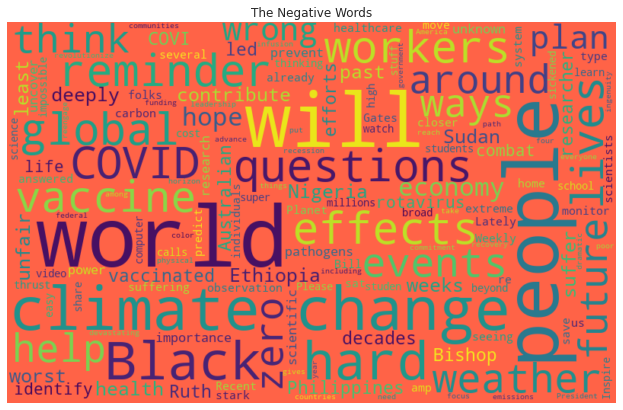

In [33]:
negative_words =' '.join([text for text in df['Tweets'][df['label'] == -1]])

wordcloud = WordCloud(background_color = 'tomato', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

#### OBSERVATION: *Negative tweets as of 26th March 2021 seem to be using words like WORLD, COVID, CLIMATE, EFFECTS, BLACK,HARD,WRONG etc* 


Text(0.5, 1.0, 'Most Frequently Occuring Words in Negative Tweets - Top 10')

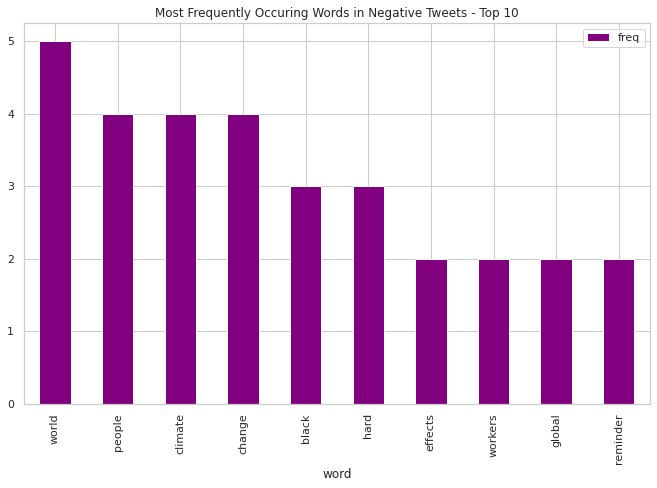

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.Tweets[df['label']==-1])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(10).plot(x='word', y='freq', kind='bar', figsize=(10, 7), color = 'purple')
plt.title("Most Frequently Occuring Words in Negative Tweets - Top 10")

**FINDING THE PERCENTAGE**

In [35]:
#Get the percentage of Positive Tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

percentage_positive= round(ptweets.shape[0]/ df.shape[0] *100,1)
print('Percentage of Positive Tweets are: '+ str(percentage_positive) + '%')

Percentage of Positive Tweets are: 72.0%


In [36]:
#Get the percentage of Negative Tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']

percentage_negative= round(ptweets.shape[0]/ df.shape[0] *100,1)
print('Percentage of Neagtive Tweets are: '+ str(percentage_negative) + '%')

Percentage of Neagtive Tweets are: 13.0%


In [37]:
#Get the percentage of Neutral Tweets
ptweets = df[df.Analysis == 'Neutral']
ptweets = ptweets['Tweets']

percentage_negative= round(ptweets.shape[0]/ df.shape[0] *100,1)
print('Percentage of Neutral Tweets are: '+ str(percentage_negative) + '%')

Percentage of Neutral Tweets are: 15.0%


**PLOTTING SENTIMENT ANAYLSIS RESULTS OF THE LATEST 100 TWEETS**

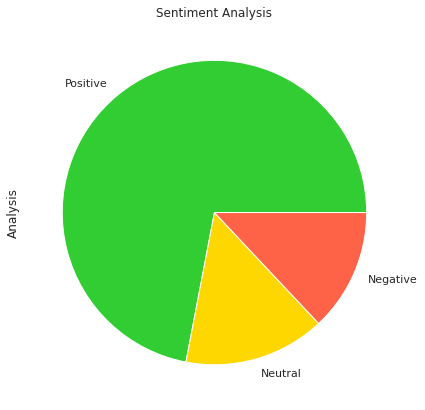

In [38]:
#Show the Value Counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.figure(figsize=(10, 7))
plt.title('Sentiment Analysis')
colors = ["limegreen", "gold", "tomato"]
df['Analysis'].value_counts().plot(kind='pie', colors=colors)

### **K MEANS CLUSTERING**

In [39]:
#Making a Dataframe with only numerical Columns
df2 = df.drop('Tweets', axis=1)
df2 = df2.drop('Analysis', axis=1)
df2 = df2.drop('Datetime', axis=1)

In [40]:
ss = StandardScaler()
ss.fit_transform(df2)

array([[-1.70918042e+00, -8.29153208e-01, -5.09166626e-01,
        -8.32805172e-01],
       [-1.70918042e+00, -8.29153208e-01, -2.07981622e+00,
        -8.32805172e-01],
       [ 1.75038241e+00,  1.28149707e+00, -2.58898284e-02,
         5.78729018e-01],
       [-1.70918042e+00, -8.29153208e-01, -1.13052251e+00,
        -8.32805172e-01],
       [ 1.48426220e+00, -3.06395938e+00, -6.99025368e-01,
        -2.24433936e+00],
       [-1.01061485e+00, -1.66720552e+00, -5.09166626e-01,
        -2.24433936e+00],
       [ 2.86721216e-01,  1.03318527e+00,  1.38942079e+00,
         5.78729018e-01],
       [ 1.78364744e+00,  6.14159112e-01,  8.71624224e-01,
         5.78729018e-01],
       [ 1.86926134e-01,  1.03318527e+00, -1.02696320e+00,
         5.78729018e-01],
       [-9.10819765e-01, -9.53309106e-01,  1.66557896e+00,
        -2.24433936e+00],
       [-1.70918042e+00, -8.29153208e-01, -5.78206169e-01,
        -8.32805172e-01],
       [ 8.35594165e-01,  2.41691417e-01,  1.52749988e+00,
      

In [41]:
#K means Clustering 
def doKmeans(X, nclust=3):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df2, 3)
kmeans = pd.DataFrame(clust_labels)

df2.insert((df2.shape[1]),'kmeans',kmeans)

**PLOTTING THE CLUSTERS OBTAINED USING K MEANS**

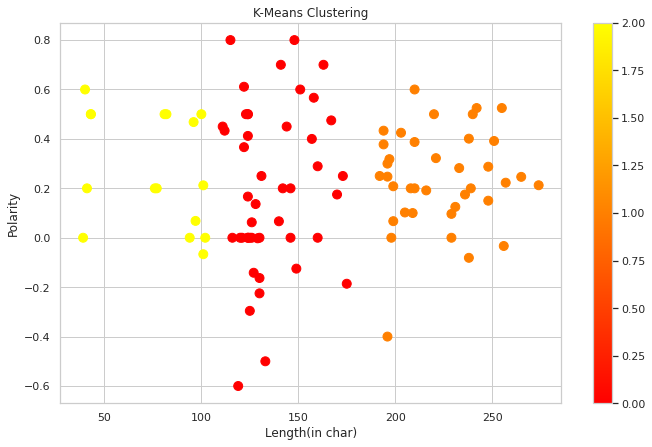

In [42]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
scatter = ax.scatter(df2['len'],df2['Polarity'],
                     c=kmeans[0],s=80, cmap="autumn")
ax.set_title('K-Means Clustering')
ax.set_xlabel('Length(in char)')
ax.set_ylabel('Polarity')
plt.colorbar(scatter)

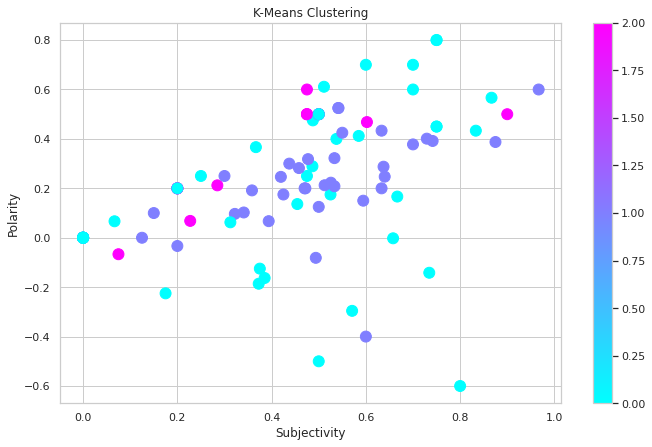

In [43]:
#Plot the clusters obtained using k means

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
scatter = ax.scatter(df2['Subjectivity'],df2['Polarity'],
                     c=kmeans[0],s=120, cmap="cool")
ax.set_title('K-Means Clustering')
ax.set_xlabel('Subjectivity')
ax.set_ylabel('Polarity')
plt.colorbar(scatter)

**END OF ASSIGNMENT**

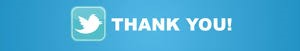

------ PALAK NATH ------